In [1]:
from diff_predictor import data_process, predxgboost, spatial
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from os import listdir, getcwd, chdir
from os.path import isfile, join
import os
from sklearn.preprocessing import scale, StandardScaler
from numpy.random import permutation


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, recall_score, precision_score, f1_score
import operator
import xgboost as xgb
import shap
from xgboost.training import CVPack
from xgboost import callback
from xgboost.core import CallbackEnv
from xgboost.core import EarlyStopException
from xgboost.core import STRING_TYPES



/Users/nelsschimek/anaconda3/envs/diff_predictor_env/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/nelsschimek/anaconda3/envs/diff_predictor_env/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-

Using current directory for loading/saving: /Users/nelsschimek/Documents/nancelab/diff_predictor/notebooks/publication_notebooks
To change current directory, call diff_predictor.core.change_dir(...)


In [2]:
workbookDir = getcwd()

print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir) # Go to current workbook Dir"
chdir('..')        # Go up one
chdir('..') 
chdir('..')        # Go up one
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

Current Notebook Dir: /Users/nelsschimek/Documents/nancelab/diff_predictor/notebooks/publication_notebooks
Using current directory for loading data: /Users/nelsschimek/Documents/nancelab


In [3]:
#age_feature_path = workbookDir + '/data/raw_data_age/'
region_feature_path = '/Users/nelsschimek/Documents/nancelab/Data/rotenone/'
region_feature_filelist = [f for f in listdir(region_feature_path) if isfile(join(region_feature_path, f)) and 'feat' in f and 'x' in f]
print(len(region_feature_filelist))

26


In [4]:
print(region_feature_filelist)

['features_091823_P10F_8DIV_50nM_ctx_2.csv', 'features_091823_P10F_8DIV_50nM_ctx_3.csv', 'features_091823_P10F_8DIV_50nM_ctx_1.csv', 'features_P10_NT_14DIV_40nm_cortex_slice_1_vid_2.csv', 'features_P10_NT_acute_40nm_slice_1_cortex_vid_1.csv', 'features_091823_P10F_6DIV stop_50nM_ctx_1.csv', 'features_091823_P10F_6DIV stop_50nM_ctx_3.csv', 'features_091823_P10F_6DIV stop_50nM_ctx_2.csv', 'features_091623_P10F_6DIV_50nM_ctx_3.csv', 'features_091623_P10F_6DIV_50nM_ctx_2.csv', 'features_P10_NT_3d_40nm_slice_1_cortex_vid_1.csv', 'features_P10_NT_1DIV_40nm_cortex_slice_1_vid_2.csv', 'features_091623_P10F_6DIV_50nM_ctx_1.csv', 'features_091623_P10F_6DIV_10uM_ctx_1.csv', 'features_091623_P10F_6DIV_10uM_ctx_3.csv', 'features_091623_P10F_6DIV_10uM_ctx_2.csv', 'features_P10_NT_11DIV_40nm_cortex_slice_1_vid_1.csv', 'features_091823_P10F_6DIV stop_10uM_ctx_3.csv', 'features_091823_P10F_6DIV stop_10uM_ctx_2.csv', 'features_091823_P10F_6DIV stop_10uM_ctx_1.csv', 'features_P10_NT_4DIV_40nm_cortex_slic

In [5]:
fstats_tot_age = data_process.generate_fullstats(region_feature_path, region_feature_filelist, ['NT', '50nM', '10uM'], 'OGD')

Adding file features_091823_P10F_8DIV_50nM_ctx_2.csv size: (790, 70)
Adding file features_091823_P10F_8DIV_50nM_ctx_3.csv size: (562, 70)
Adding file features_091823_P10F_8DIV_50nM_ctx_1.csv size: (935, 70)


Adding file features_P10_NT_14DIV_40nm_cortex_slice_1_vid_2.csv size: (4194, 67)
Adding file features_P10_NT_acute_40nm_slice_1_cortex_vid_1.csv size: (2400, 67)
Adding file features_091823_P10F_6DIV stop_50nM_ctx_1.csv size: (709, 70)
Adding file features_091823_P10F_6DIV stop_50nM_ctx_3.csv size: (583, 70)
Adding file features_091823_P10F_6DIV stop_50nM_ctx_2.csv size: (1124, 70)
Adding file features_091623_P10F_6DIV_50nM_ctx_3.csv size: (490, 70)
Adding file features_091623_P10F_6DIV_50nM_ctx_2.csv size: (1406, 70)
Adding file features_P10_NT_3d_40nm_slice_1_cortex_vid_1.csv size: (3738, 67)
Adding file features_P10_NT_1DIV_40nm_cortex_slice_1_vid_2.csv size: (945, 67)
Adding file features_091623_P10F_6DIV_50nM_ctx_1.csv size: (1008, 70)
Adding file features_091623_P10F_6DIV_10uM_ctx_1.csv size: (109, 70)
Adding file features_091623_P10F_6DIV_10uM_ctx_3.csv size: (182, 70)
Adding file features_091623_P10F_6DIV_10uM_ctx_2.csv size: (109, 70)
Adding file features_P10_NT_11DIV_40nm_cor

In [6]:
feature_list = [
    'alpha', # Fitted anomalous diffusion alpha exponenet
    'D_fit', # Fitted anomalous diffusion coefficient
    'kurtosis', # Kurtosis of track
    'asymmetry1', # Asymmetry of trajecory (0 for circular symmetric, 1 for linear)
    'asymmetry2', # Ratio of the smaller to larger principal radius of gyration
    'asymmetry3', # An asymmetric feature that accnts for non-cylindrically symmetric pt distributions
    'AR', # Aspect ratio of long and short side of trajectory's minimum bounding rectangle
    'elongation', # Est. of amount of extension of trajectory from centroid
    'boundedness', # How much a particle with Deff is restricted by a circular confinement of radius r
    'fractal_dim', # Measure of how complicated a self similar figure is
    'trappedness', # Probability that a particle with Deff is trapped in a region
    'efficiency', # Ratio of squared net displacement to the sum of squared step lengths
    'straightness', # Ratio of net displacement to the sum of squared step lengths
    'MSD_ratio', # MSD ratio of the track
    #'frames', # Number of frames the track spans
    'Deff1', # Effective diffusion coefficient at 0.33 s
    'Deff2', # Effective diffusion coefficient at 3.3 s
    #'angle_mean', # Mean turning angle which is counterclockwise angle from one frame point to another
    #'angle_mag_mean', # Magnitude of the turning angle mean
    #'angle_var', # Variance of the turning angle
    #'dist_tot', # Total distance of the trajectory
    #'dist_net', # Net distance from first point to last point
    #'progression', # Ratio of the net distance traveled and the total distance
    'Mean alpha', 
    'Mean D_fit', 
    'Mean kurtosis', 
    'Mean asymmetry1', 
    'Mean asymmetry2',
    'Mean asymmetry3', 
    'Mean AR',
    'Mean elongation', 
    'Mean boundedness',
    'Mean fractal_dim', 
    'Mean trappedness', 
    'Mean efficiency',
    'Mean straightness', 
    'Mean MSD_ratio', 
    'Mean Deff1', 
    'Mean Deff2',
    ]

target = 'OGD'

In [7]:
ecm = fstats_tot_age[feature_list + [target, 'Track_ID', 'X', 'Y']] #dont think i need these rn
print(ecm.shape)
ecm = ecm[~ecm[list(set(feature_list) - set(['Deff2', 'Mean Deff2']))].isin([np.nan, np.inf, -np.inf]).any(1)]       # Removing nan and inf data points
#ecm = ecm[~ecm[list(set(feature_list))].isin([np.nan, np.inf, -np.inf]).any(1)]       # Removing nan and inf data points

ecm.shape

(35520, 36)


(26228, 36)

In [81]:
ecm = ecm.drop_duplicates(subset=['Mean Deff1', 'Mean Deff2'], keep='first') # Remove duplicate track_IDs
ecm.shape

(296, 37)

In [61]:
for feat in feature_list:
    #ecm[feat] = scale(ecm[feat].values)
    print(ecm[feat].mean())

0.7798408017828476
2.689970771675277
2.9703840086157407
0.7447519604823083
0.25107377295289984
0.27622403946209495
65277407795310.43
0.48489521815191655
0.08529084353203852
1.8938225101873183
-0.20142144068214712
0.5710642239292482
0.15381248566036473
0.8328446652631503
72.78638123434297
0.9561646665297318
0.2039090308227373
0.7799222795405608
2.6899698310559543
3.06453285180765
0.7445880541132971
0.2511905744369014
0.27612973015633974
65266724011179.61
0.485468186396021
0.08496345982477099
1.8934630641662717
-0.201520280775844
0.5723127161224164
0.15381475588647242
0.8295501303063262
0.9524018602156463
0.28566750767913834


In [21]:
ecm_filt = ecm[ecm['Mean Deff1'] < 50]
ecm_filt.shape

(26228, 37)

In [134]:
def full_preprocess(ecm, balanced=True, y_scramble=False, target=None):

    rand_state = np.random.randint(1, 2000)
    if balanced:
        bal_ecm = data_process.balance_data(ecm, target, random_state=rand_state)
        bal_ecm = bal_ecm.reset_index(drop=True)
        #sampled_df = bal_ecm.sample(frac=0.5)
        sampled_df = data_process.bin_data(bal_ecm)
    else:
        sampled_df = data_process.bin_data(ecm)
    label_df = sampled_df[target]
    features_df = sampled_df.drop([target, 'X', 'Y', 'binx', 'biny', 'bins', 'Track_ID'], axis=1)
    features = features_df.columns

    if y_scramble:
        perm = permutation(len(label_df))
        label_shuffled = label_df[perm]
        le = preprocessing.LabelEncoder()
        sampled_df['encoded_target'] = le.fit_transform(label_shuffled)
    else:
        le = preprocessing.LabelEncoder()
        sampled_df['encoded_target'] = le.fit_transform(sampled_df[target])

    seed = rand_state
    np.random.seed(seed)
    train_split = 0.7
    test_split = 0.5


    training_bins = np.random.choice(sampled_df['bins'].unique(), int(len(sampled_df['bins'].unique())*train_split), replace=False)

    X_train = sampled_df[sampled_df['bins'].isin(training_bins)]
    X_test_val = sampled_df[~sampled_df['bins'].isin(training_bins)]
    X_val, X_test = train_test_split(X_test_val, test_size=test_split, random_state=seed)

    y_train = X_train['encoded_target']
    y_test = X_test['encoded_target']
    y_val = X_val['encoded_target']

    dtrain = xgb.DMatrix(X_train[features], label=y_train)
    dtest = xgb.DMatrix(X_test[features], label=y_test)
    dval = xgb.DMatrix(X_val[features], label=y_val)
    return dtrain, dtest, dval, X_train, X_test, y_train, y_test, le



In [8]:
param = {'max_depth': 3,
         'eta': 0.005,
         'min_child_weight': 0,
         'verbosity': 0,
         'objective': 'multi:softprob',
         'num_class': 3,
         'silent': 'True',
         'gamma': 5,
         'subsample': 0.15,
         'colsample_bytree': 0.8,
         'eval_metric': "mlogloss",
#          # GPU integration will cut time in ~half:
#          'gpu_id' : 0,
#          'tree_method': 'gpu_hist',
#          'predictor': 'gpu_predictor'
         }

In [9]:
bal_ecm = data_process.balance_data(ecm, target, random_state=1)
bal_ecm = data_process.bin_data(bal_ecm, resolution=128)
label_df = bal_ecm[target]
features_df = bal_ecm.drop([target, 'Track_ID', 'X', 'Y', 'binx', 'biny', 'bins'], axis=1)
features = features_df.columns

# Regular split

seed = 1234
np.random.seed(seed)
train_split = 0.8
test_split = 0.5

le = preprocessing.LabelEncoder()
bal_ecm['encoded_target'] = le.fit_transform(bal_ecm[target])

training_bins = np.random.choice(bal_ecm.bins.unique(), int(len(bal_ecm.bins.unique())*train_split), replace=False)

X_train = bal_ecm[bal_ecm.bins.isin(training_bins)]
X_test_val = bal_ecm[~bal_ecm.bins.isin(training_bins)]
X_val, X_test = train_test_split(X_test_val, test_size=test_split, random_state=seed)

y_train = X_train['encoded_target']
y_test = X_test['encoded_target']
y_val = X_val['encoded_target']

# dtrain = X_train[features]
# dtest = X_test[features]
# dval = X_val[features]

dtrain = xgb.DMatrix(X_train[features], label=y_train)
dtest = xgb.DMatrix(X_test[features], label=y_test)
dval = xgb.DMatrix(X_val[features], label=y_val)

Ratio before data balance (50nM:NT:10uM) = 6190:17032:3006
Ratio after balance (50nM:NT:10uM) = 3006:3006:3006


In [10]:
best_param = predxgboost.xgb_paramsearch(X_train, y_train, feature_list, init_params=param, num_round=1000, nfold=5, early_stopping_rounds=10, verbose_eval=10)

Using CV with subsample={0.6}, colsample_bytree={0.9}
Using CV with subsample={0.6}, colsample_bytree={0.5}
Using CV with subsample={1.0}, colsample_bytree={1.0}
Using CV with subsample={1.0}, colsample_bytree={0.9}
Using CV with subsample={1.0}, colsample_bytree={0.5}
Using CV with subsample={0.6}, colsample_bytree={1.0}
Using CV with max_depth={2}, min_child_weight={10}
New best param found: mlogloss = {0.6529290500564017}, boost_rounds = {1999}
Using CV with max_depth={2}, min_child_weight={0}
New best param found: mlogloss = {0.652840222927242}, boost_rounds = {1999}
Using CV with max_depth={3}, min_child_weight={10}
New best param found: mlogloss = {0.6515543668922731}, boost_rounds = {1711}
Using CV with max_depth={3}, min_child_weight={0}
Using CV with max_depth={10}, min_child_weight={10}
Using CV with max_depth={5}, min_child_weight={10}
Using CV with max_depth={10}, min_child_weight={0}
Using CV with max_depth={5}, min_child_weight={0}
Using CV with max_depth={2}, min_child_w

In [18]:
print(best_param)

(      train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
0                1.094046            0.000201            1.094785   
1                1.089475            0.000335            1.090861   
2                1.084968            0.000392            1.086741   
3                1.080715            0.000744            1.083063   
4                1.076339            0.000747            1.079227   
...                   ...                 ...                 ...   
1131             0.402931            0.006674            0.638166   
1132             0.402796            0.006697            0.638088   
1133             0.402643            0.006678            0.638079   
1134             0.402544            0.006695            0.638054   
1135             0.402423            0.006701            0.638019   

      test-mlogloss-std  
0              0.000379  
1              0.000746  
2              0.000885  
3              0.001296  
4              0.001584  
...           

In [29]:
best_param_cort = {'max_depth': 2, 'eta': 0.01, 'min_child_weight': 10, 'verbosity': 0, 'objective': 'multi:softprob', 'num_class': 3, 'silent': 'True', 'gamma': 1.0, 'subsample': 0.15, 'colsample_bytree': 0.8, 'eval_metric': 'mlogloss'}
best_boost_rounds_cort = 1153

In [25]:
best_param_rando = {'max_depth': 4, 'eta': 0.005, 'min_child_weight': 0, 'verbosity': 0, 'objective': 'multi:softprob', 'num_class': 3, 'silent': 'True', 'gamma': 5.0, 'subsample': 0.6, 'colsample_bytree': 0.7, 'eval_metric': 'mlogloss'}

In [30]:
# Currently using parameters found in the diff_mode analysis notebook for age
booster, acc, true_label, preds = predxgboost.train(best_param_cort, dtrain, dtest, dval, evals=[(dtrain, 'train'), (dval, 'eval')], num_round=1153, verbose=True)


[0]	train-mlogloss:1.09400	eval-mlogloss:1.09505
[1]	train-mlogloss:1.08939	eval-mlogloss:1.09083
[2]	train-mlogloss:1.08483	eval-mlogloss:1.08700
[3]	train-mlogloss:1.08033	eval-mlogloss:1.08273
[4]	train-mlogloss:1.07735	eval-mlogloss:1.08033
[5]	train-mlogloss:1.07312	eval-mlogloss:1.07672
[6]	train-mlogloss:1.06895	eval-mlogloss:1.07322
[7]	train-mlogloss:1.06471	eval-mlogloss:1.06974
[8]	train-mlogloss:1.06070	eval-mlogloss:1.06640
[9]	train-mlogloss:1.05654	eval-mlogloss:1.06257
[10]	train-mlogloss:1.05256	eval-mlogloss:1.05928
[11]	train-mlogloss:1.04855	eval-mlogloss:1.05597
[12]	train-mlogloss:1.04478	eval-mlogloss:1.05242
[13]	train-mlogloss:1.04207	eval-mlogloss:1.05020
[14]	train-mlogloss:1.03819	eval-mlogloss:1.04691
[15]	train-mlogloss:1.03450	eval-mlogloss:1.04389
[16]	train-mlogloss:1.03082	eval-mlogloss:1.04061
[17]	train-mlogloss:1.02718	eval-mlogloss:1.03730
[18]	train-mlogloss:1.02354	eval-mlogloss:1.03459
[19]	train-mlogloss:1.01967	eval-mlogloss:1.03129
[20]	train

In [34]:
class_names = ['10uM', '5nM', 'HC']
class_results = classification_report(true_label, preds, digits=4, target_names = class_names)
print(str(class_results))

              precision    recall  f1-score   support

        10uM     0.6170    0.6656    0.6404       305
         5nM     0.6589    0.5828    0.6185       338
          HC     0.8030    0.8406    0.8214       320

    accuracy                         0.6947       963
   macro avg     0.6930    0.6963    0.6934       963
weighted avg     0.6935    0.6947    0.6929       963



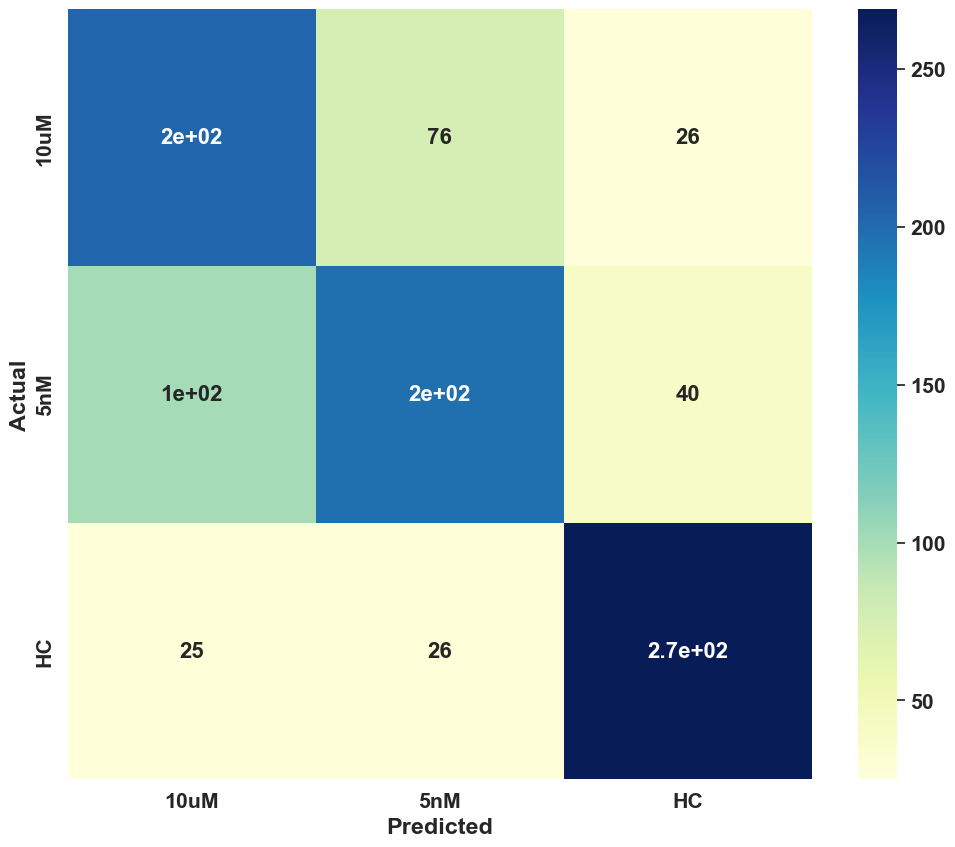

In [35]:
metrics.confusion_matrix(y_test, preds)
plt.figure(figsize=(12,10))
cm_array = metrics.confusion_matrix(true_label, preds)
df_cm = pd.DataFrame(cm_array, index = class_names, columns = class_names)

sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="YlGnBu")
ax.set(xlabel='Predicted', ylabel='Actual')

plt.show()

In [36]:
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test[features])

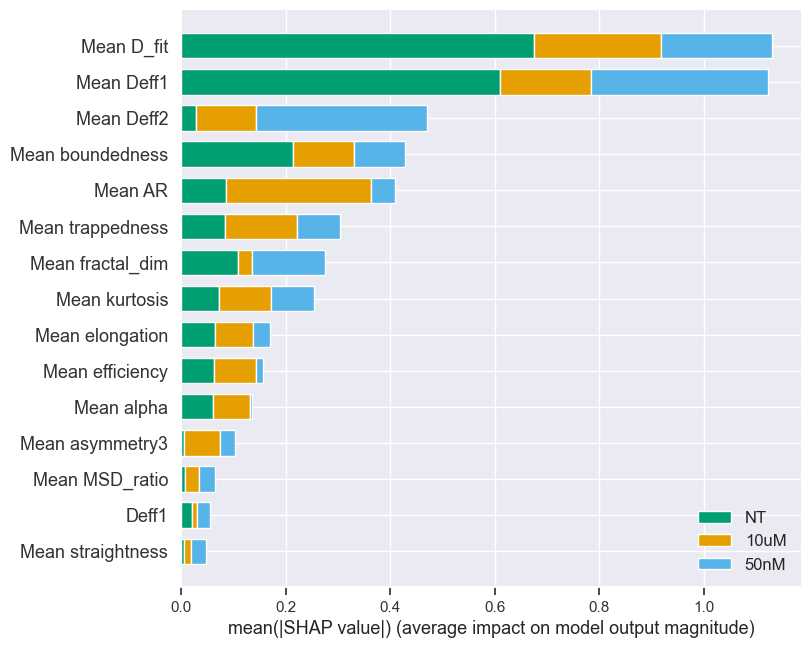

In [29]:
from matplotlib import colors as plt_colors

explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test[features])
c_NT = '#E69F00'
c_HYase = '#56B4E9'
c_ChABC = '#009E73'

colors = [c_NT, c_HYase, c_ChABC]
class_inds = np.argsort([-np.abs(shap_values[i]).mean() for i in range(len(shap_values))])
cmap = plt_colors.ListedColormap(np.array(colors)[class_inds])
shap.summary_plot(shap_values, X_test[features], class_names=np.array(class_names), max_display=15, title='Total SHAP Values', color=cmap)

In [37]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

In [ ]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

In [89]:
le.classes_

array(['0_5', '1_5', 'NT'], dtype=object)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Text(0.5, 1.0, 'Top 5 Features for 10uM')

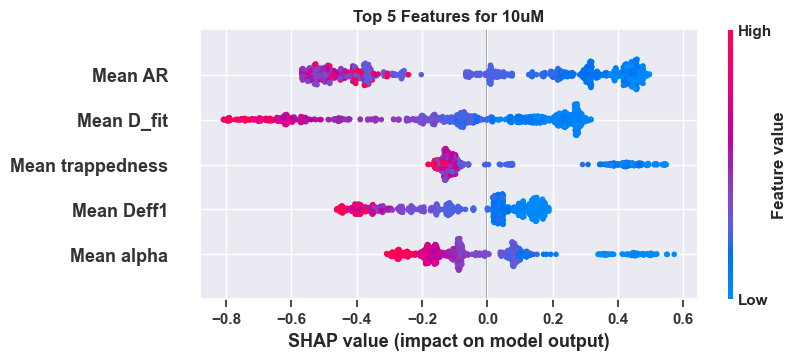

In [38]:
shap.summary_plot(shap_values[0], X_test[feature_list], max_display=5, show=False, color_bar=True)
plt.gcf().axes[-1].set_aspect(50)
plt.gcf().axes[-1].set_box_aspect(50)
plt.title(f'Top 5 Features for {class_names[0]}')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Text(0.5, 1.0, 'Top 5 Features for 5nM')

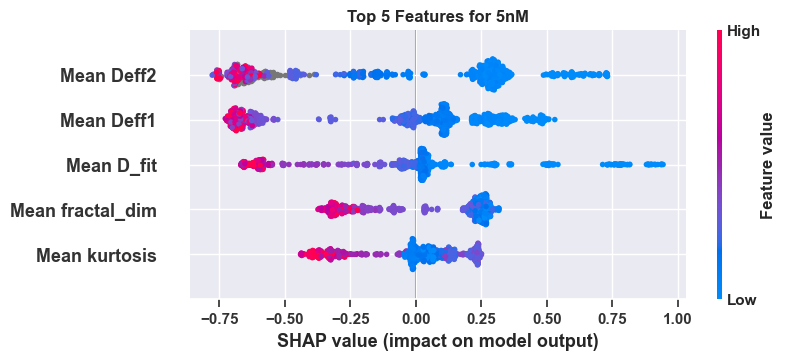

In [39]:
shap.summary_plot(shap_values[1], X_test[feature_list], max_display=5, show=False, color_bar=True)
plt.gcf().axes[-1].set_aspect(50)
plt.gcf().axes[-1].set_box_aspect(50)
plt.title(f'Top 5 Features for {class_names[1]}')
#plt.savefig('striatum_shap_new.pdf', dpi=300, bbox_inches='tight')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Text(0.5, 1.0, 'Top 5 Features for HC')

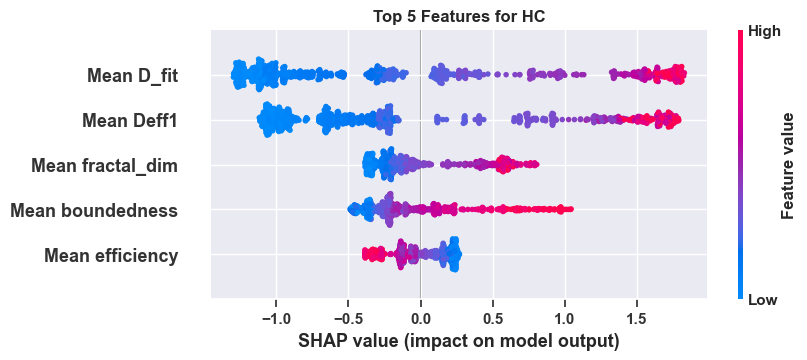

In [40]:
shap.summary_plot(shap_values[2], X_test[feature_list], max_display=5, show=False, color_bar=True)
plt.gcf().axes[-1].set_aspect(50)
plt.gcf().axes[-1].set_box_aspect(50)
plt.title(f'Top 5 Features for {class_names[2]}')

Plotting SHAP values for 1_5


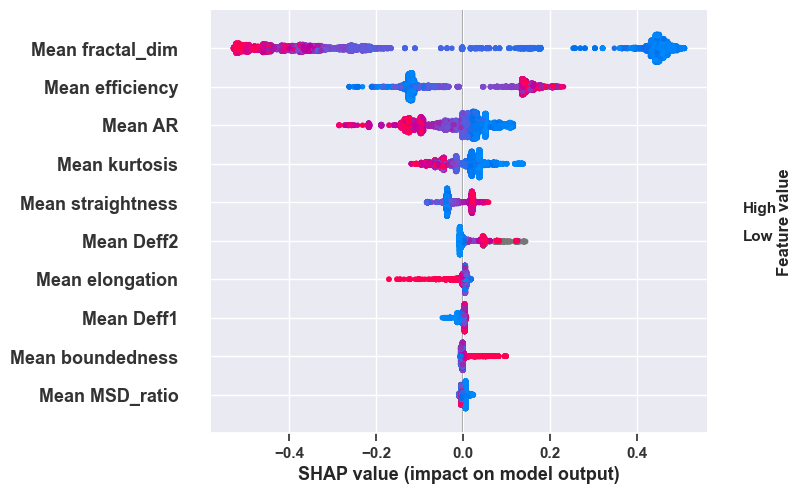

Plotting SHAP values for NT


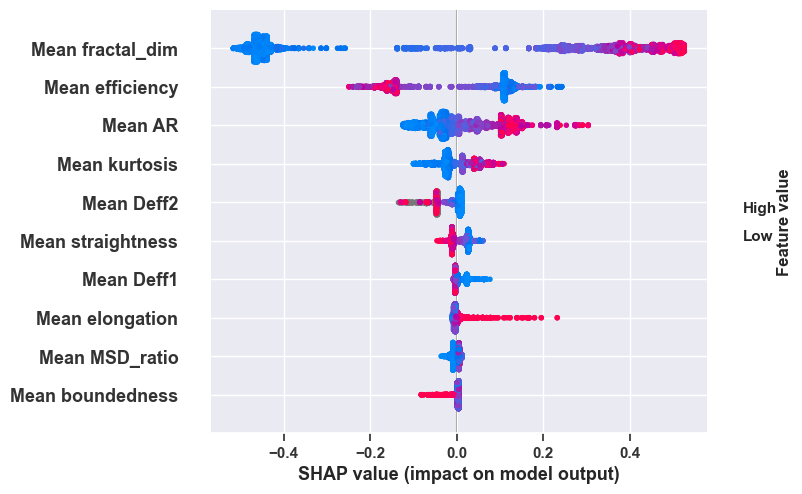

IndexError: index 2 is out of bounds for axis 0 with size 2

<Figure size 750x500 with 0 Axes>

In [59]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

for i in range(3): 
    figsize = (7.5, 5)
    fig = plt.figure(figsize=figsize)
    # ax = fig.gca()
    print(f'Plotting SHAP values for {le.classes_[i]}')
    shap.summary_plot(shap_values[i], X_test[feature_list], max_display=10, title=f'SHAP Values for {le.classes_[i]}', color=cmap)

In [110]:
explainer.

SyntaxError: invalid syntax (3702948619.py, line 1)

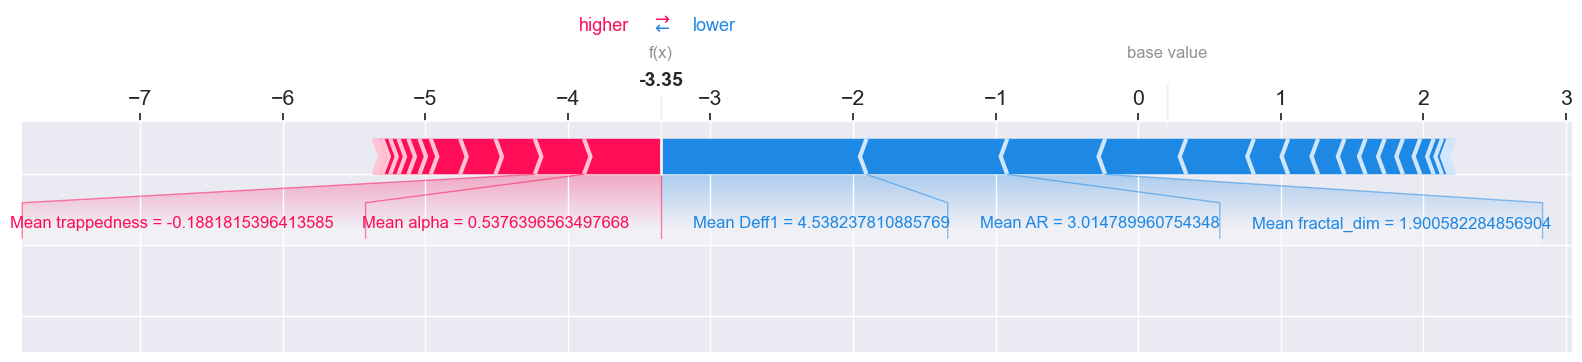

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test[features].iloc[0,:], matplotlib=True)

In [ ]:
X_display

NameError: name 'X_display' is not defined

alpha
D_fit
kurtosis
asymmetry1
asymmetry2
asymmetry3
AR
elongation
boundedness
fractal_dim
trappedness
efficiency
straightness
MSD_ratio
Deff1
Deff2
Mean alpha


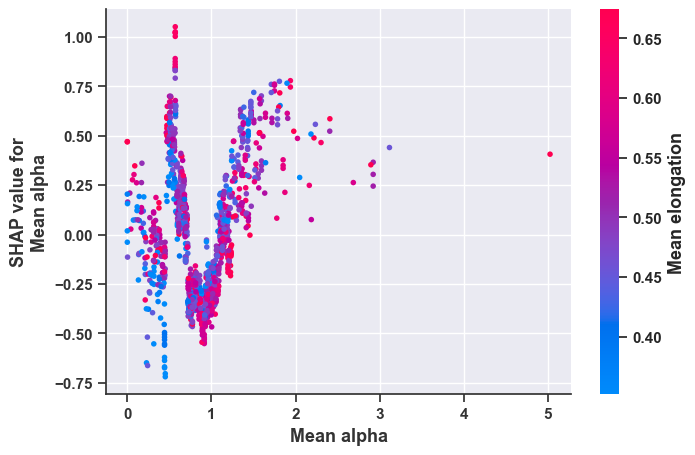

Mean D_fit


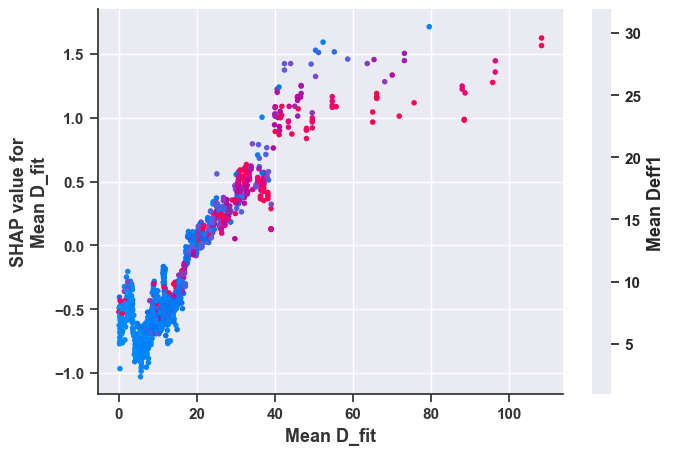

Mean kurtosis


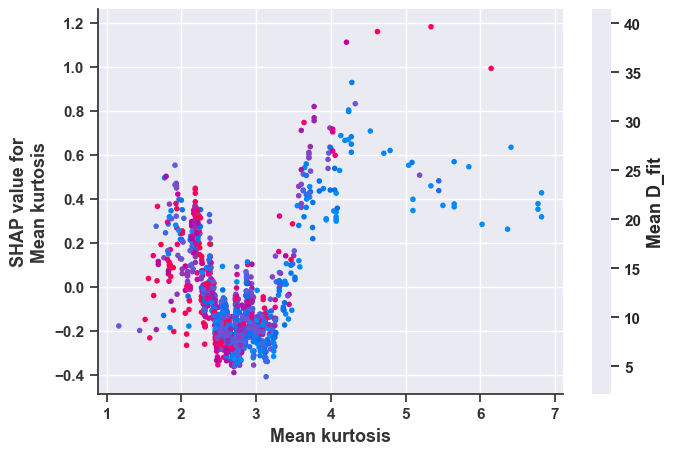

Mean asymmetry1


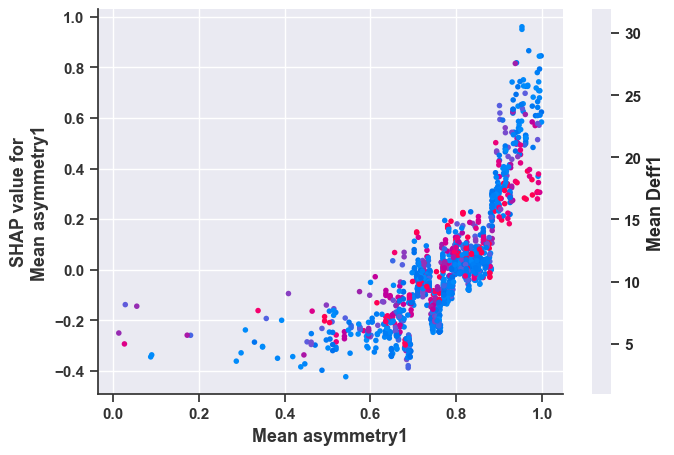

Mean asymmetry2


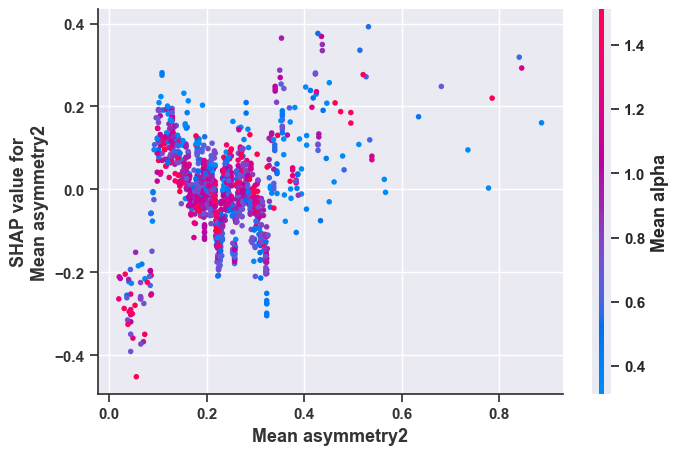

Mean asymmetry3


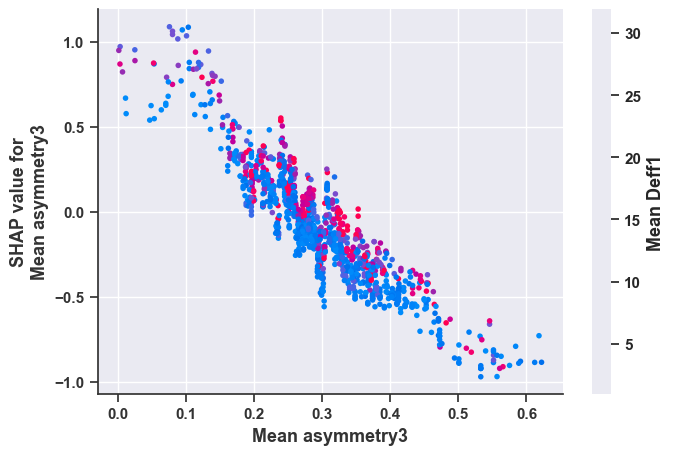

Mean AR


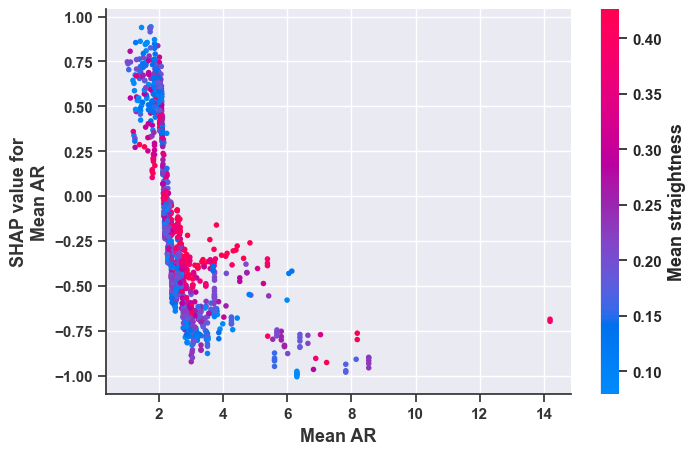

Mean elongation


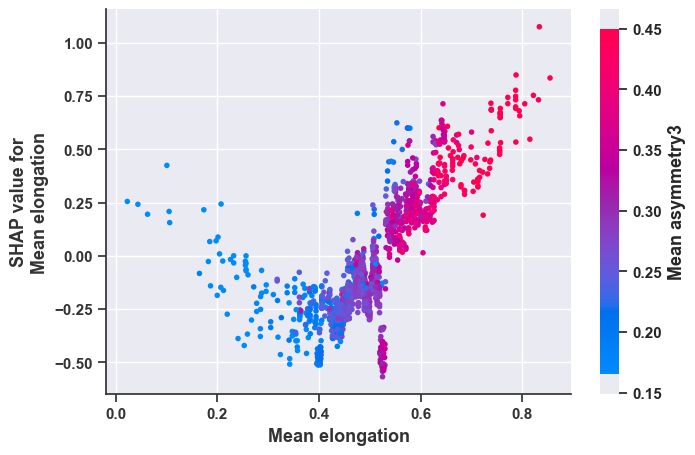

Mean boundedness


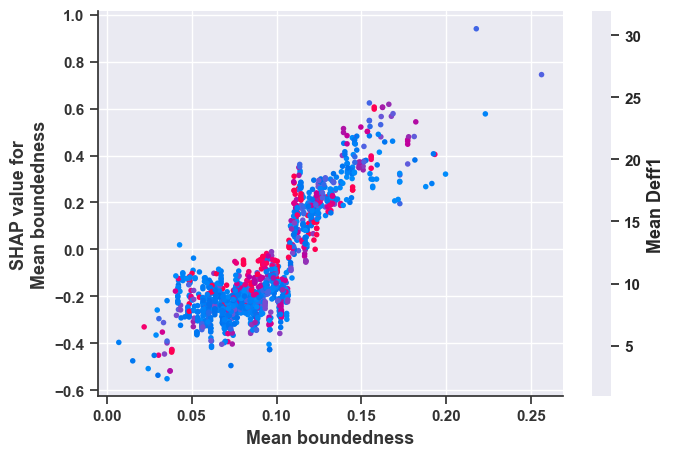

Mean fractal_dim


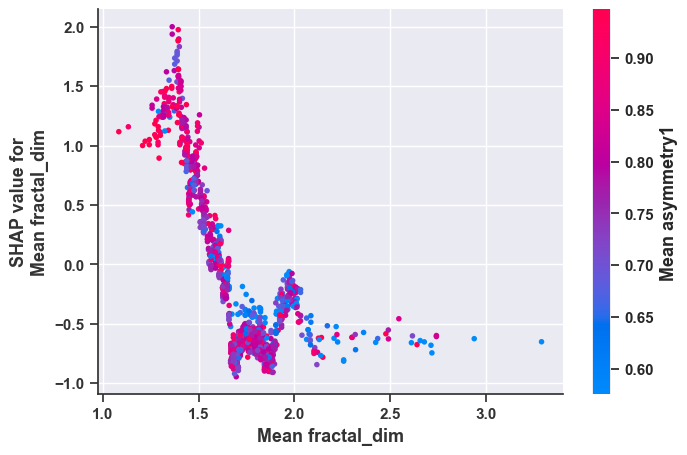

Mean trappedness


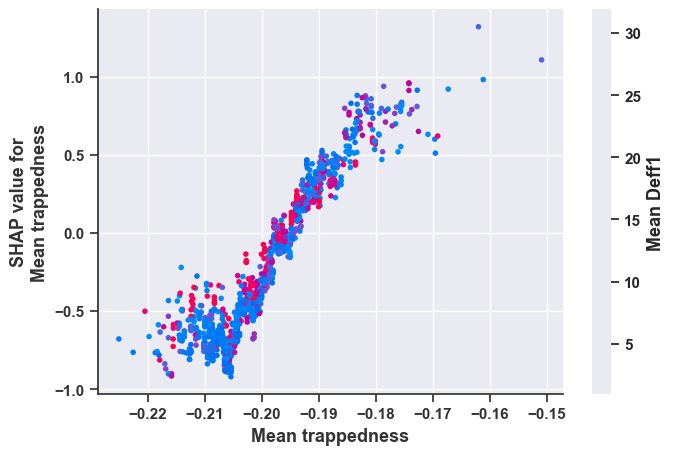

Mean efficiency


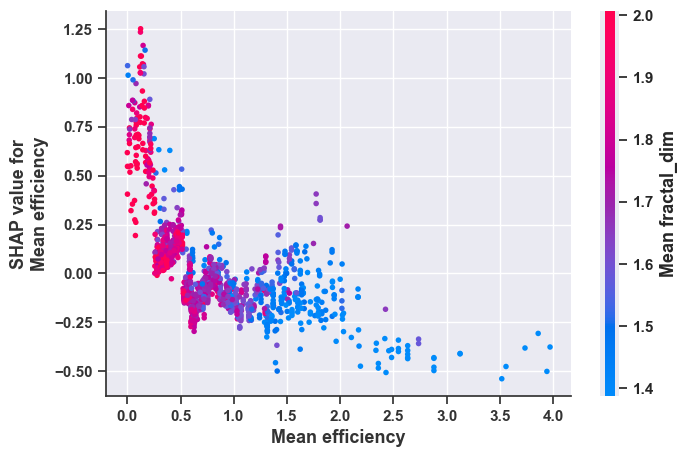

Mean straightness


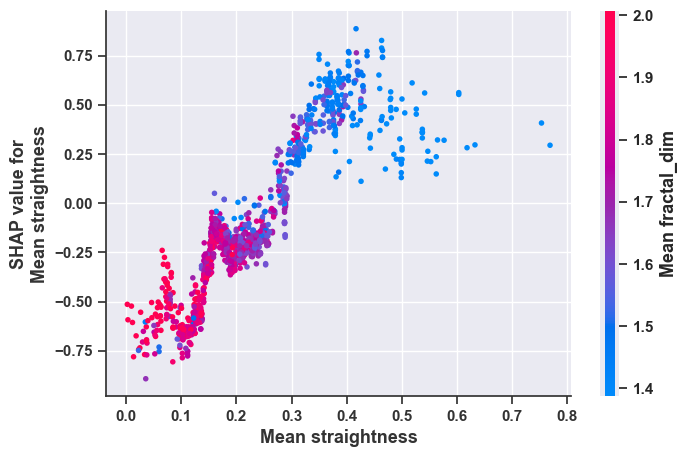

Mean MSD_ratio


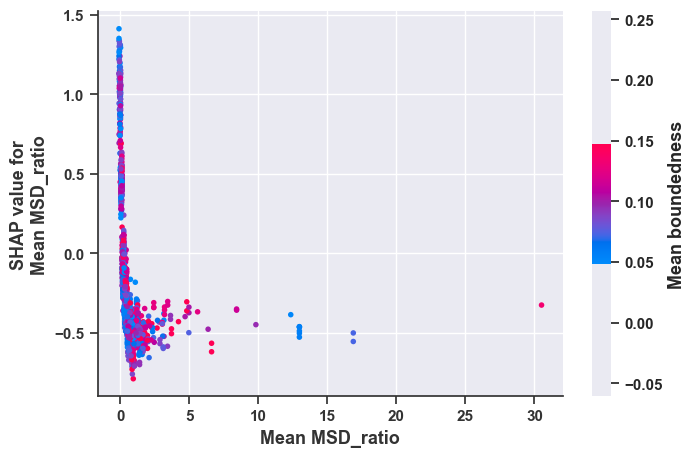

Mean Deff1


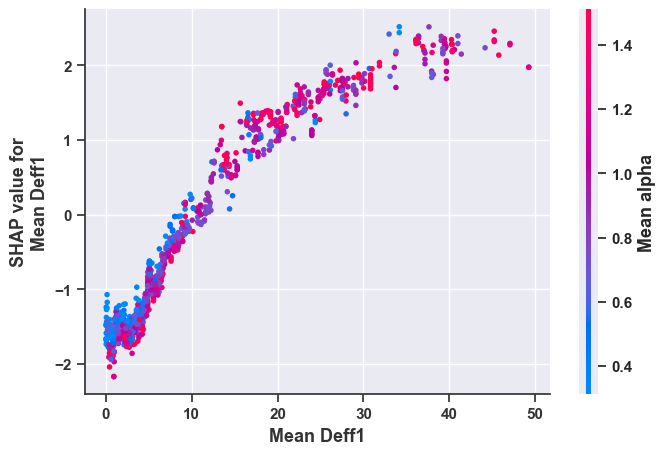

Mean Deff2


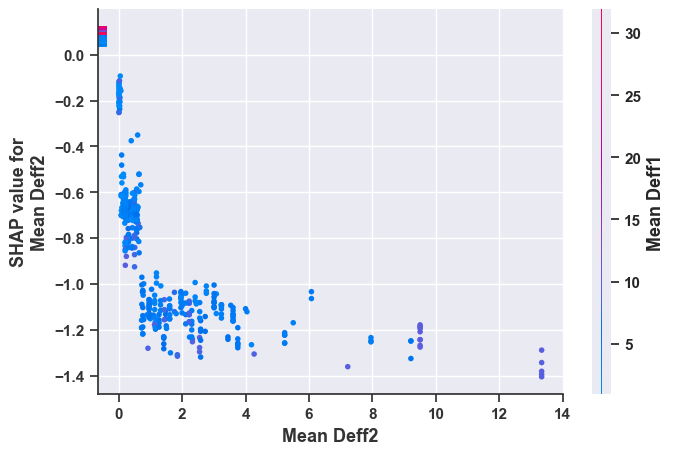

In [128]:
for name in X_train[features].columns:
    print(name)
    if 'Mean' in name:
        shap.dependence_plot(ind=name, shap_values=shap_values[0], features=X_test[features])

In [138]:
shap_interaction_values = explainer.shap_interaction_values(X_test[features])

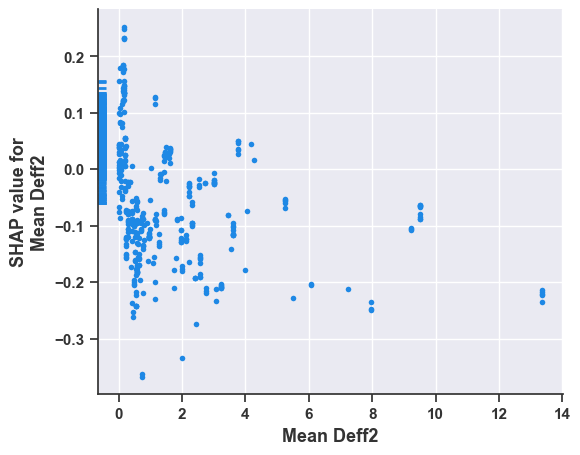

In [180]:
shap.dependence_plot(ind='Mean Deff2', shap_values=shap_values[2], features=X_test[features], interaction_index=None)

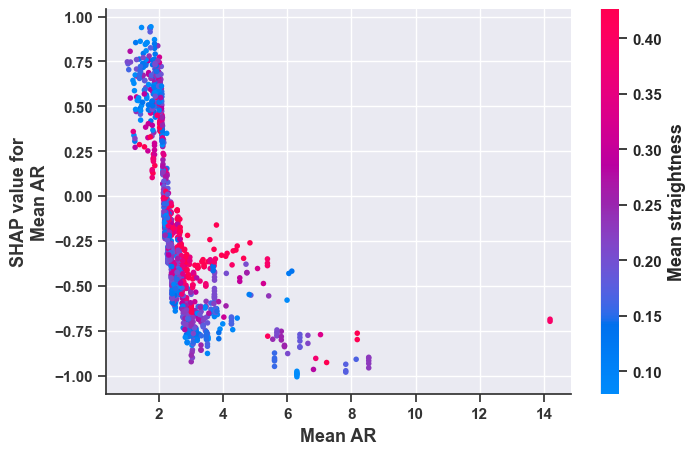

In [166]:
shap.dependence_plot(ind='Mean AR', shap_values=shap_values[0], features=X_test[features], interaction_index='auto')

In [167]:
shap_interaction_values[0].shape

(1340, 32, 32)

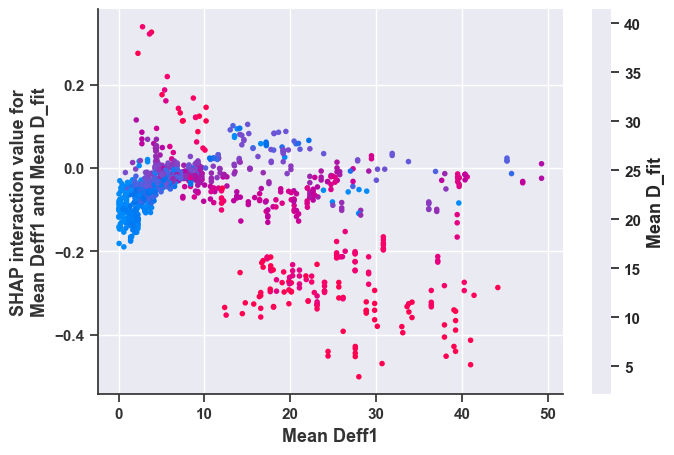

In [175]:
shap.dependence_plot(("Mean Deff1", "Mean D_fit"), shap_interaction_values[0], X_test[features])#, interaction_index="Mean elongation")

In [135]:
X_test[features].shape

(1340, 32)

In [137]:
shap_interaction_values[0].shape

(1430, 32, 32)